## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana klasör yolu
main_dir = "/content/drive/MyDrive/ColabNotebooks/NaturalDisasters"
output_dir = "Natural_Disasters_Split"

# Eğitim ve test için hedef klasörler
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Klasörleri oluştur
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Her sınıfı işle
for disaster_class in os.listdir(main_dir):
    class_path = os.path.join(main_dir, disaster_class)

    # Eğer bir klasörse işlem yap
    if os.path.isdir(class_path):
        # Sınıf için yeni klasörler oluştur
        train_class_dir = os.path.join(train_dir, disaster_class)
        test_class_dir = os.path.join(test_dir, disaster_class)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Görüntüleri al
        files = os.listdir(class_path)
        files = [f for f in files if os.path.isfile(os.path.join(class_path, f))]

        # Eğitim ve test verisini ayır
        train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

        # Eğitim dosyalarını taşı
        for file in train_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(train_class_dir, file)
            shutil.copy(src, dest)

        # Test dosyalarını taşı
        for file in test_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(test_class_dir, file)
            shutil.copy(src, dest)

print("Train-test ayrımı tamamlandı!")


Train-test ayrımı tamamlandı!


Please download the dataset from the below url

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Natural_Disasters_Split/train'
valid_path = '/content/Natural_Disasters_Split/test'


In [7]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('/content/Natural_Disasters_Split/train/*')

In [12]:
folders

['/content/Natural_Disasters_Split/train/Wildfires',
 '/content/Natural_Disasters_Split/train/Tsunami',
 '/content/Natural_Disasters_Split/train/Hurricane_Typhoon',
 '/content/Natural_Disasters_Split/train/Volcanic_Eruption',
 '/content/Natural_Disasters_Split/train/Tornado',
 '/content/Natural_Disasters_Split/train/Earthquake',
 '/content/Natural_Disasters_Split/train/Landslide',
 '/content/Natural_Disasters_Split/train/Flood',
 '/content/Natural_Disasters_Split/train/Drought',
 '/content/Natural_Disasters_Split/train/Avalanche']

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,591,242 (93.81 MB)

 Trainable params: 1,003,530 (3.83 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Natural_Disasters_Split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1384 images belonging to 10 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/Natural_Disasters_Split/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 351 images belonging to 10 classes.


In [30]:
# Modeli eğit
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=200,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 375ms/step - accuracy: 0.6479 - loss: 1.4947 - val_accuracy: 0.4729 - val_loss: 2.6621
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 366ms/step - accuracy: 0.6360 - loss: 1.3251 - val_accuracy: 0.5556 - val_loss: 2.1217
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 370ms/step - accuracy: 0.7425 - loss: 0.8835 - val_accuracy: 0.4444 - val_loss: 2.7605
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 364ms/step - accuracy: 0.6963 - loss: 0.9672 - val_accuracy: 0.4729 - val_loss: 2.7273
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - accuracy: 0.7383 - loss: 0.9070 - val_accura

In [31]:
import matplotlib.pyplot as plt

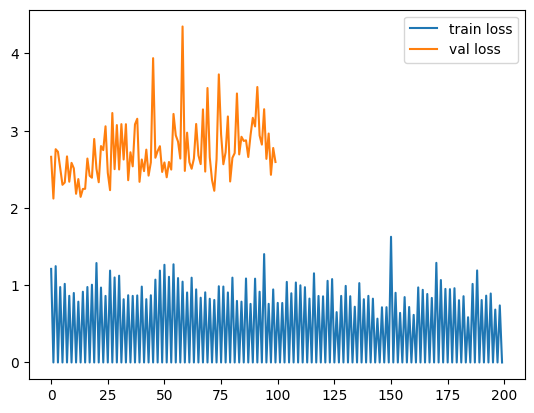

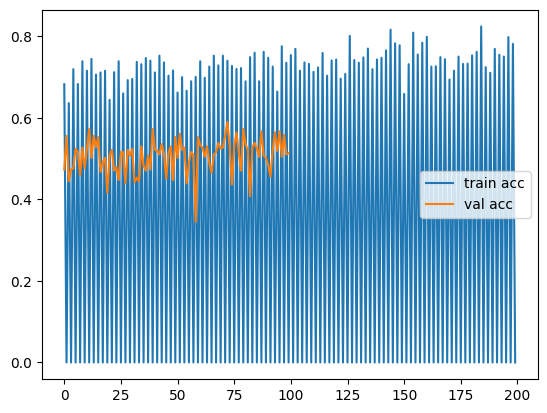

<Figure size 640x480 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [34]:

y_pred = model.predict(test_set)


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step


In [35]:
y_pred

array([[1.8679948e-03, 1.4495463e-04, 7.6386563e-02, ..., 4.5592650e-03,
        3.1149212e-01, 4.1962554e-05],
       [2.7633301e-04, 1.3659222e-11, 5.2867901e-01, ..., 4.8571849e-07,
        2.3433894e-03, 4.5332808e-06],
       [1.7664240e-01, 8.9028508e-05, 7.3190196e-03, ..., 1.0538318e-03,
        6.7616254e-01, 9.0850476e-04],
       ...,
       [2.2509949e-04, 3.6206875e-05, 4.6632625e-02, ..., 5.4680397e-05,
        9.4292396e-01, 5.5823415e-03],
       [2.5197733e-07, 5.7193506e-06, 9.9983597e-01, ..., 7.4149721e-05,
        8.3861894e-05, 2.2237879e-14],
       [1.4512474e-04, 8.5172111e-08, 2.9774099e-03, ..., 2.0914879e-03,
        3.5578392e-05, 9.7893644e-03]], dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([5, 2, 8, 6, 8, 8, 8, 3, 0, 1, 3, 8, 3, 5, 0, 6, 9, 2, 1, 4, 1, 8,
       0, 3, 3, 0, 5, 1, 0, 2, 8, 9, 9, 6, 6, 6, 6, 8, 0, 2, 4, 2, 8, 9,
       3, 2, 9, 2, 8, 8, 2, 9, 7, 3, 6, 1, 8, 6, 1, 6, 3, 0, 8, 6, 6, 3,
       7, 8, 6, 8, 3, 3, 6, 9, 8, 3, 2, 0, 8, 1, 0, 3, 3, 7, 8, 0, 2, 3,
       8, 6, 5, 1, 1, 0, 9, 9, 3, 8, 2, 1, 9, 0, 2, 8, 8, 3, 1, 3, 0, 2,
       3, 3, 0, 4, 2, 3, 9, 3, 6, 9, 8, 2, 3, 9, 2, 7, 3, 8, 1, 2, 4, 6,
       6, 2, 7, 2, 2, 3, 6, 5, 9, 6, 1, 1, 1, 8, 3, 3, 6, 6, 4, 2, 2, 4,
       3, 9, 8, 4, 4, 2, 3, 5, 3, 6, 8, 8, 1, 9, 4, 6, 2, 8, 8, 6, 1, 0,
       6, 2, 6, 6, 0, 3, 1, 8, 3, 3, 7, 8, 6, 4, 6, 6, 4, 9, 0, 3, 8, 2,
       5, 2, 0, 4, 2, 4, 2, 8, 9, 6, 2, 8, 2, 1, 3, 8, 1, 3, 4, 8, 6, 9,
       4, 1, 8, 2, 3, 3, 1, 6, 2, 8, 4, 4, 8, 8, 2, 8, 2, 0, 8, 9, 6, 3,
       8, 0, 0, 8, 2, 1, 4, 1, 6, 7, 9, 6, 8, 9, 8, 3, 6, 5, 6, 3, 6, 0,
       1, 6, 3, 5, 6, 5, 8, 0, 8, 7, 9, 1, 8, 8, 2, 6, 2, 5, 6, 3, 1, 3,
       1, 8, 2, 2, 6, 3, 6, 2, 8, 3, 0, 3, 6, 2, 3,

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet50.h5')

In [41]:
img=image.load_img('/content/drive/MyDrive/Data Seience/Proje4/Volkanik Patlama.png',target_size=(224,224))



In [42]:
x=image.img_to_array(img)
x

array([[[ 14.,  16.,  28.],
        [ 15.,  19.,  30.],
        [ 17.,  21.,  32.],
        ...,
        [121., 115., 115.],
        [121., 115., 115.],
        [121., 115., 115.]],

       [[ 13.,  16.,  25.],
        [ 14.,  16.,  28.],
        [ 15.,  19.,  30.],
        ...,
        [122., 116., 116.],
        [121., 117., 116.],
        [121., 117., 116.]],

       [[ 11.,  14.,  23.],
        [ 12.,  15.,  24.],
        [ 14.,  17.,  26.],
        ...,
        [120., 116., 115.],
        [121., 117., 116.],
        [120., 116., 115.]],

       ...,

       [[ 54.,  34.,  33.],
        [ 57.,  37.,  39.],
        [ 48.,  34.,  35.],
        ...,
        [ 52.,  49.,  54.],
        [ 42.,  36.,  42.],
        [ 32.,  30.,  35.]],

       [[ 56.,  38.,  38.],
        [ 64.,  38.,  40.],
        [ 74.,  43.,  41.],
        ...,
        [ 21.,  20.,  25.],
        [ 26.,  24.,  29.],
        [ 15.,  14.,  19.]],

       [[ 45.,  32.,  32.],
        [ 60.,  39.,  35.],
        [ 70.,  

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[4.6267978e-28, 2.1205078e-07, 8.2760154e-14, 2.5125507e-23,
        3.6754047e-28, 1.3911950e-20, 9.9999976e-01, 1.1106754e-31,
        7.7195210e-34, 2.7738034e-19]], dtype=float32)

In [47]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [48]:
a==1

array([False])

In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'2.17.1'